In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from feature_selector.feature_selector import FeatureSelector

In [2]:
train = pd.read_csv('train (1).csv')

In [3]:
train.drop(['survey_date','surveyid'],inplace=True,axis=1)

In [4]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1143 entries, 0 to 1142
Data columns (total 73 columns):
village                    1143 non-null int64
femaleres                  1143 non-null int64
age                        1143 non-null float64
married                    1143 non-null int64
children                   1143 non-null int64
hhsize                     1143 non-null int64
edu                        1143 non-null int64
hh_children                1143 non-null int64
hh_totalmembers            809 non-null float64
cons_nondurable            1143 non-null float64
asset_livestock            1143 non-null float64
asset_durable              1143 non-null float64
asset_phone                1143 non-null float64
asset_savings              1143 non-null float64
asset_land_owned_total     1143 non-null float64
asset_niceroof             1143 non-null int64
cons_allfood               1143 non-null float64
cons_ownfood               1143 non-null float64
cons_alcohol               1

In [5]:
nul_col=[[col,train[col].isnull().sum()] for col in train.columns if train[col].isnull().sum() != 0]

In [6]:
print(nul_col)

[['hh_totalmembers', 334], ['cons_alcohol', 43], ['cons_tobacco', 20], ['cons_med_children', 419], ['fs_chskipm_often', 416], ['fs_chwholed_often', 416], ['fs_meat', 334], ['fs_enoughtom', 334], ['fs_sleephun', 334], ['med_expenses_hh_ep', 693], ['med_expenses_sp_ep', 878], ['med_expenses_child_ep', 600], ['med_portion_sickinjured', 334], ['med_port_sick_child', 416], ['med_afford_port', 423], ['med_sickdays_hhave', 334], ['med_healthconsult', 423], ['med_u5_deaths', 1084], ['ed_expenses', 463], ['ed_expenses_perkid', 463], ['ed_schoolattend', 463], ['ed_sch_missedpc', 467], ['ed_work_act_pc', 571]]


In [7]:
un=[col for col in train.columns if  train[col].isnull().sum()/1143 > 0.2]

In [8]:
clean_col=list(set(train.columns)-set(un))

In [9]:
len(clean_col)

52

In [10]:
tr=train[clean_col]

In [11]:
tr.nunique()

fs_adwholed_often           5
femaleres                   2
cons_nondurable           808
saved_mpesa                 2
ent_farmrevenue           309
given_mpesa                 2
edu                        18
cons_allfood              763
asset_phone                77
received_mpesa              2
fs_adskipm_often            5
cons_other                549
ent_nonag_revenue         110
ent_wagelabor               2
asset_land_owned_total     61
hhsize                     12
asset_livestock           274
asset_durable             586
ent_employees               5
amount_received_mpesa      28
nondurable_investment     767
amount_saved_mpesa         41
early_survey                2
ent_nonag_flowcost        156
labor_primary               2
asset_niceroof              2
ent_total_cost            704
day_of_week                 7
ent_business                2
village                   241
cons_ownfood              466
cons_social               334
ent_animalstockrev        224
ent_nonagb

In [12]:
cat_col = [col for col in tr.columns if tr[col].nunique()<12]
num_col = [col for col in tr.columns if tr[col].nunique()>12]

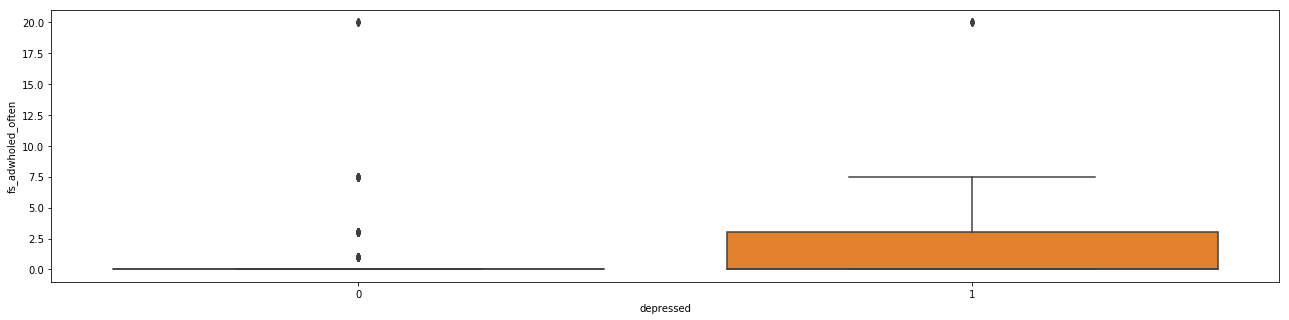

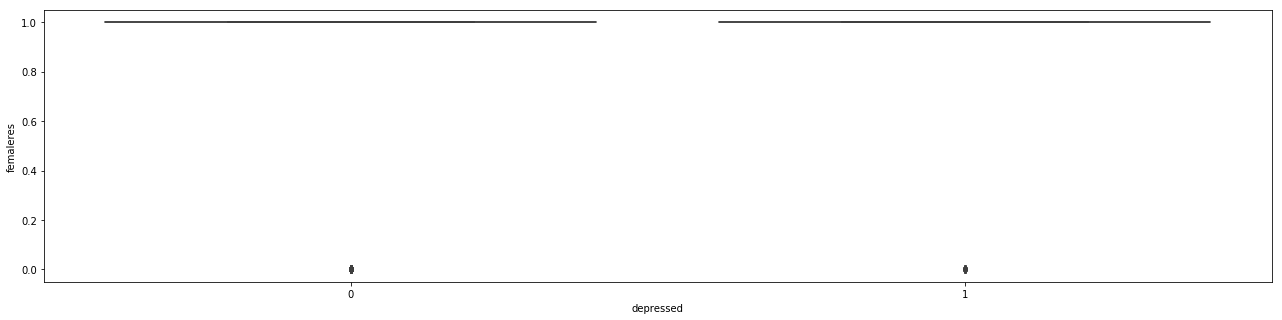

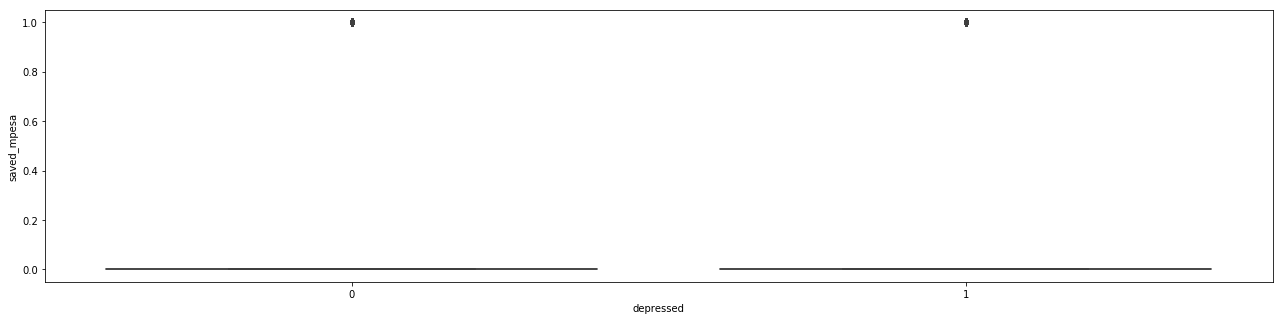

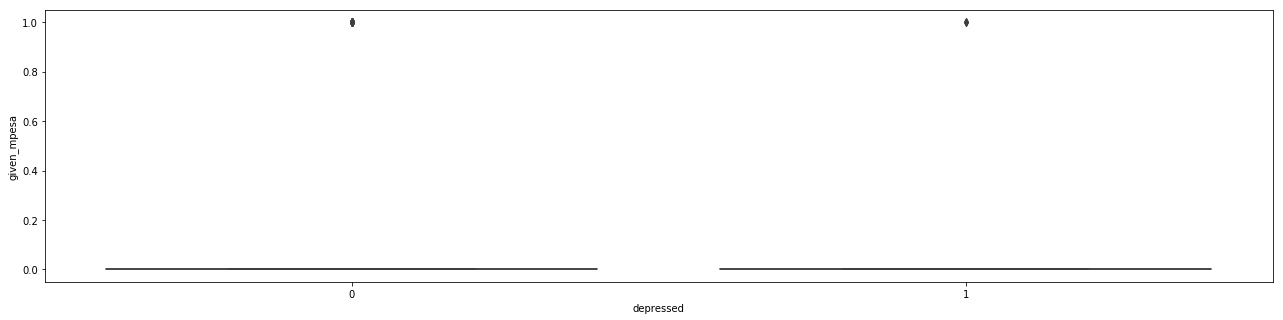

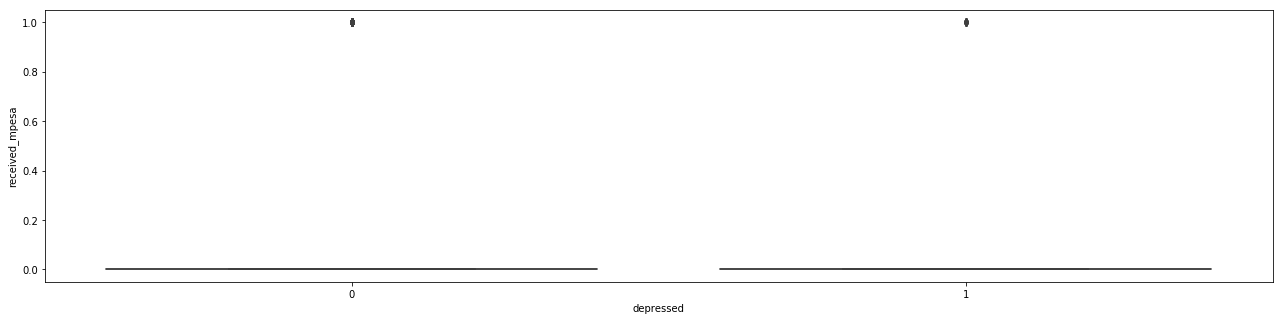

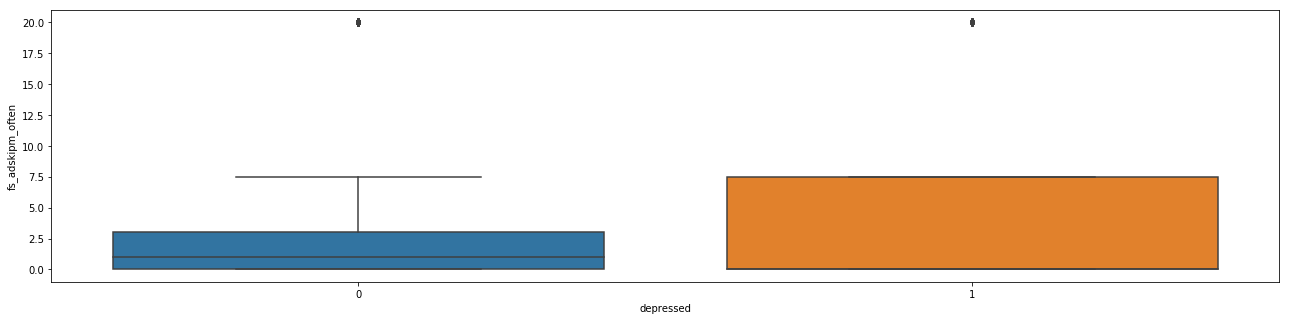

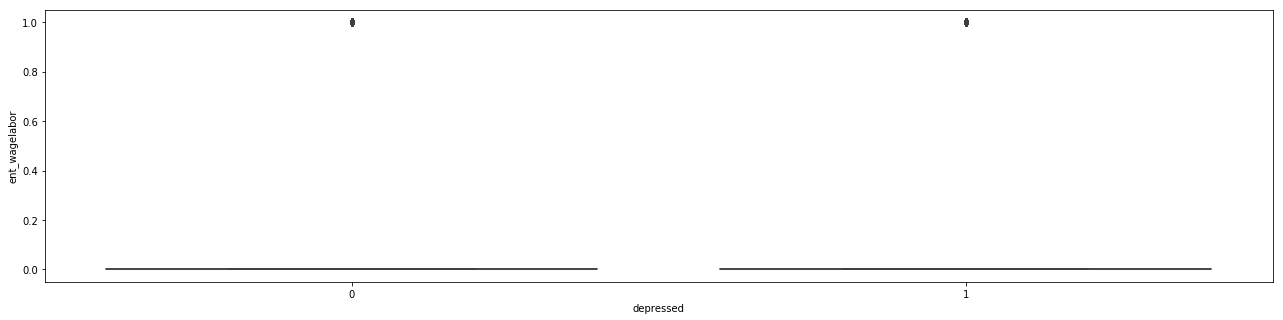

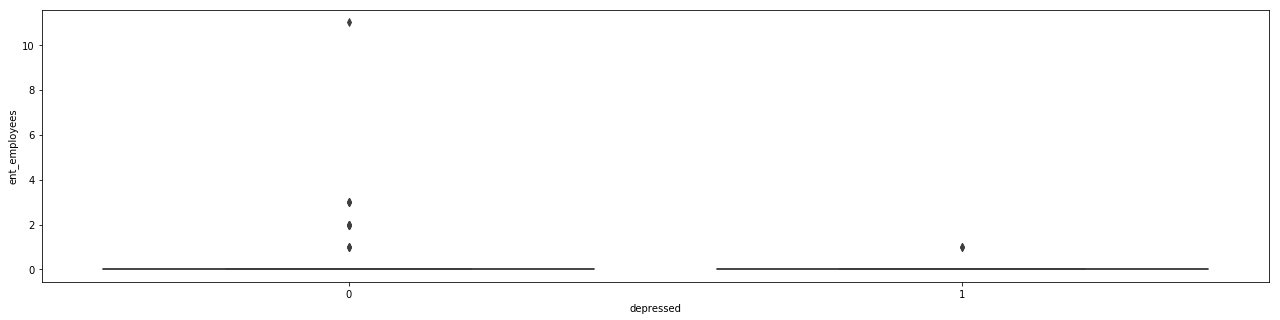

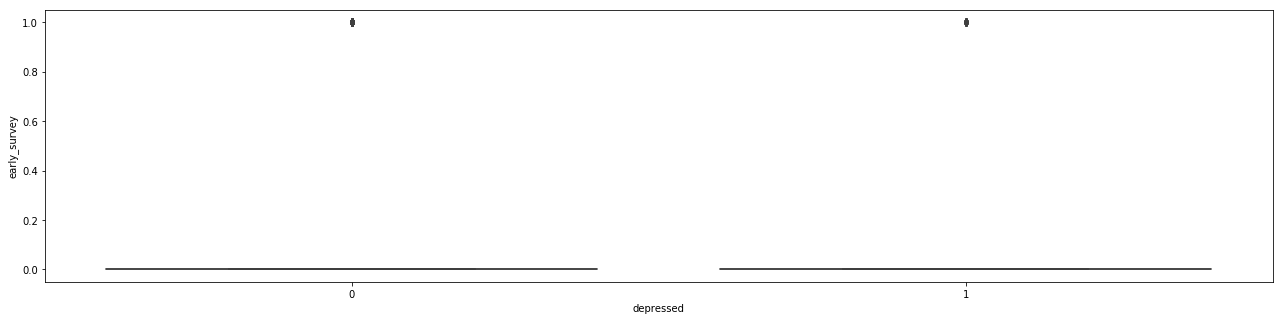

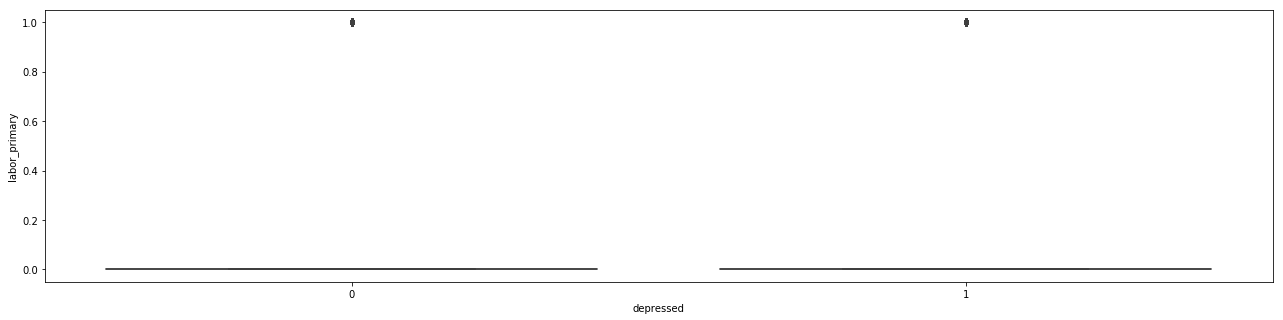

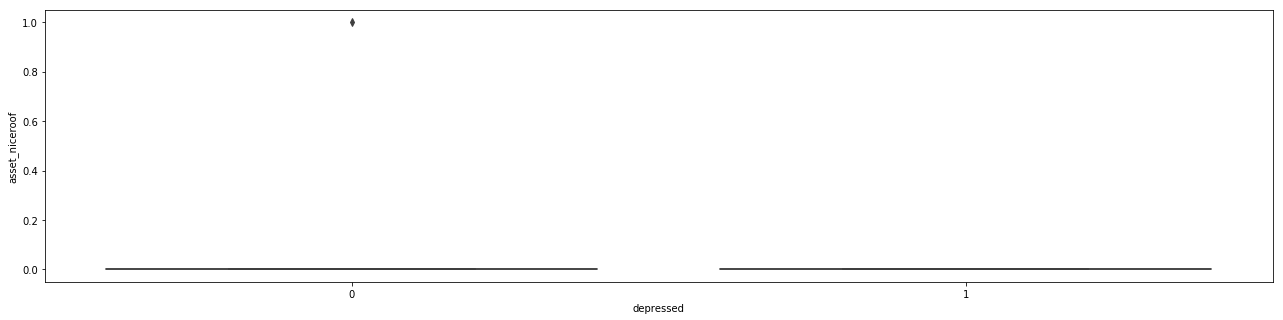

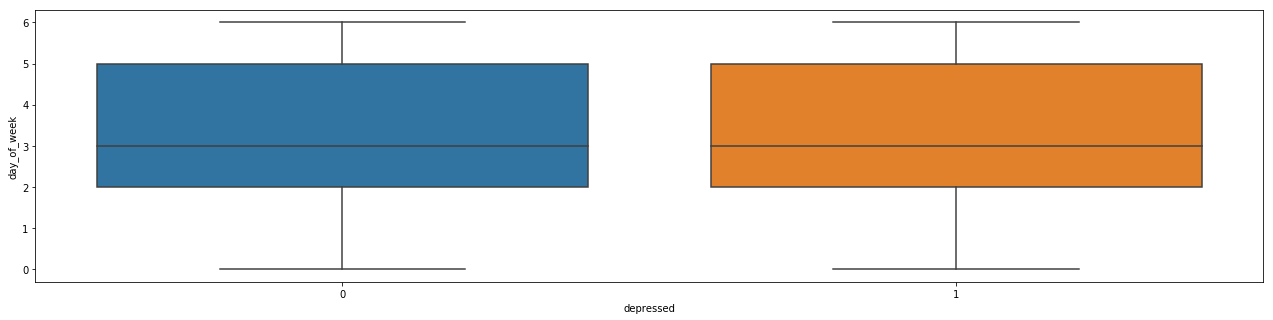

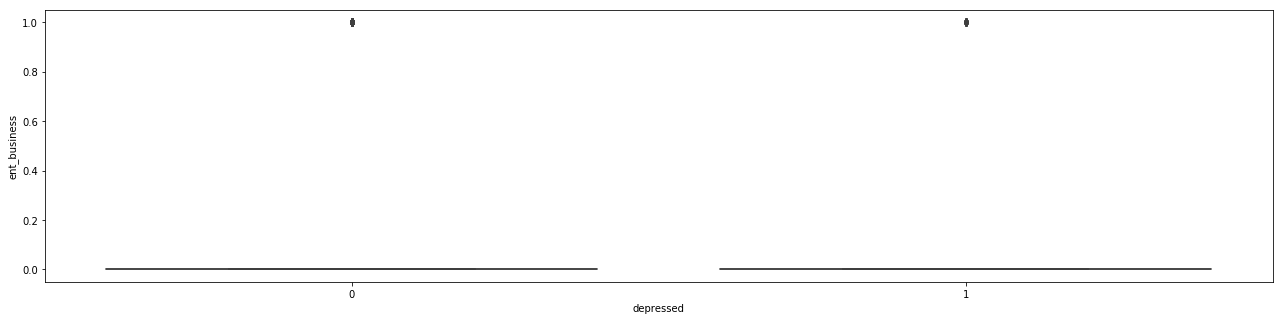

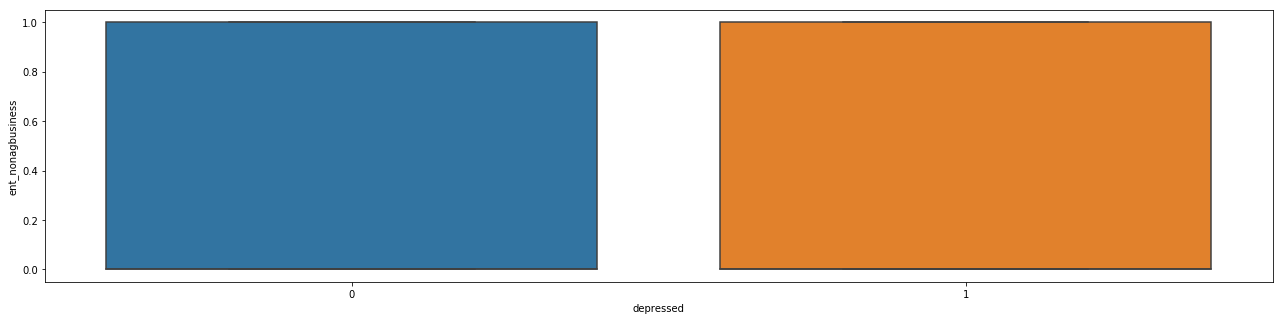

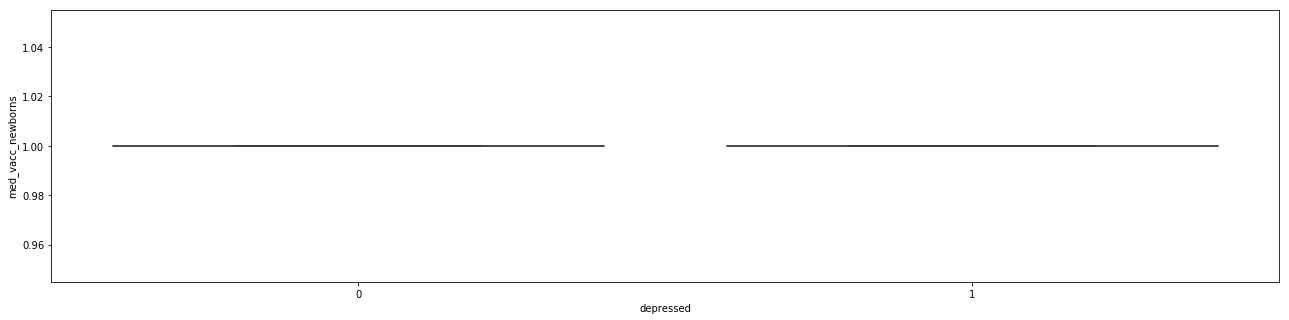

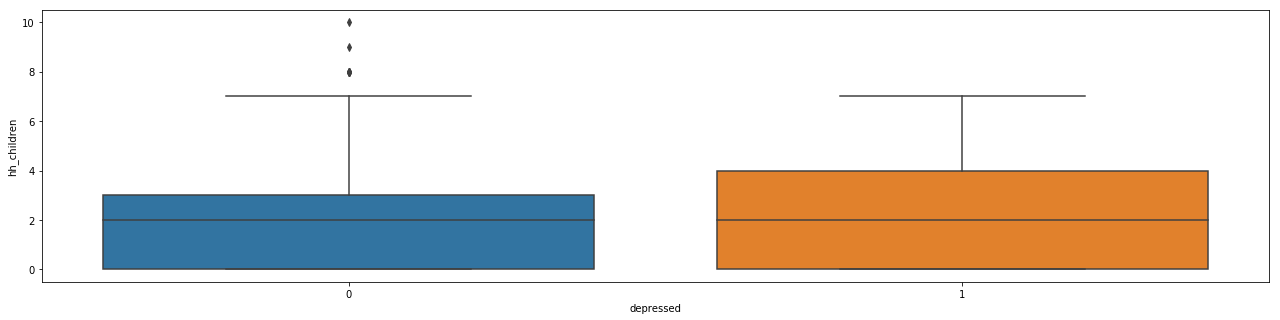

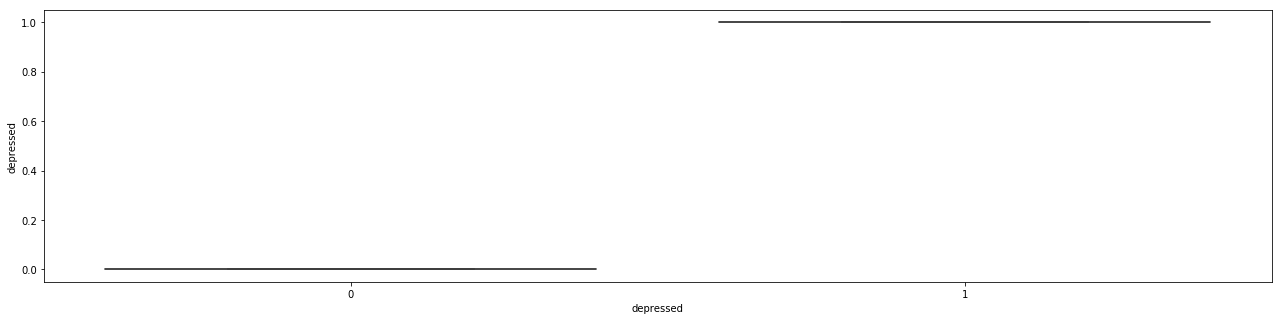

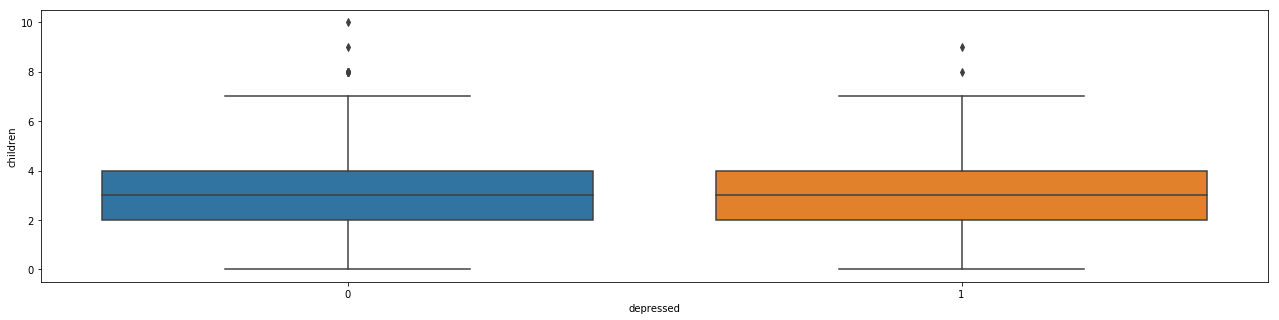

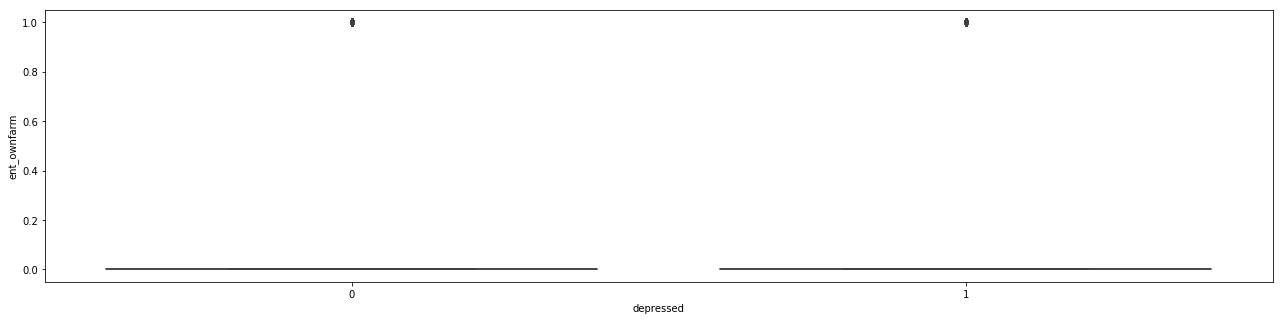

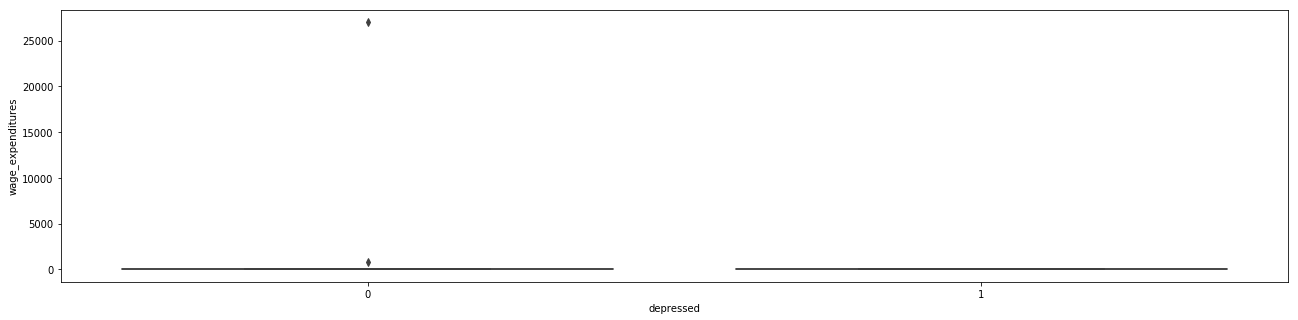

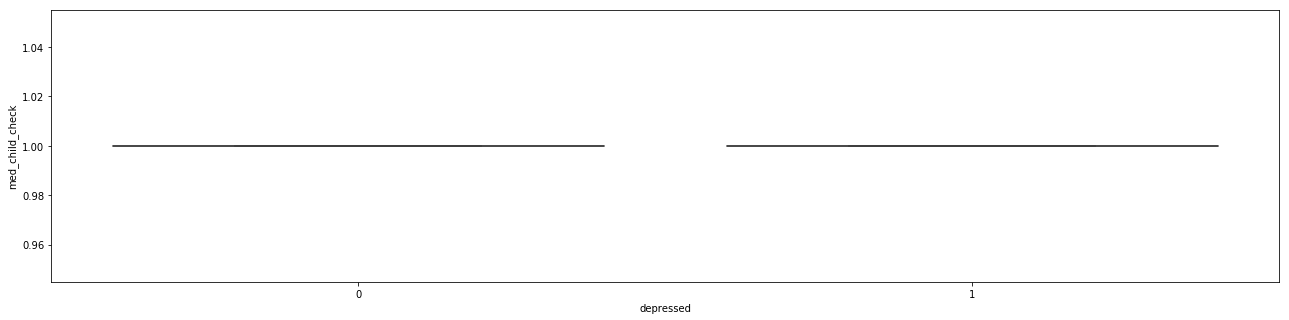

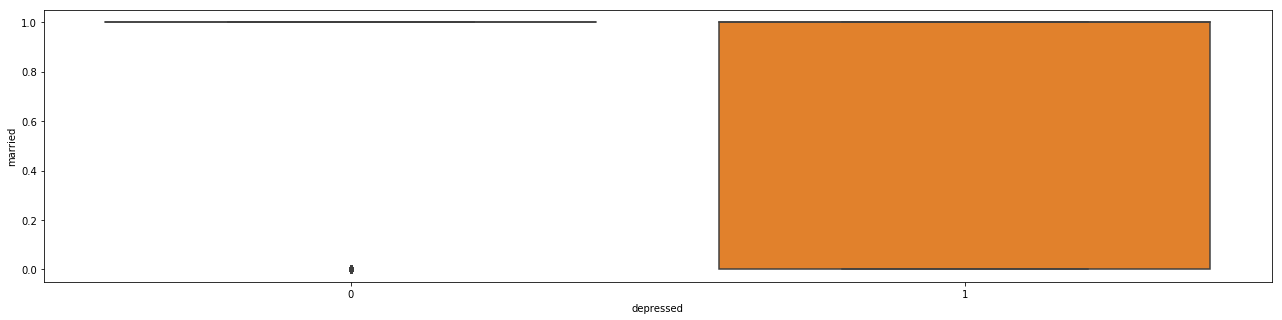

In [13]:
def plot_bar(data, cols, col_x = None):
    for col in cols:
        plt.figure(figsize=(22,5))
        sns.boxplot(col_x, y=col, data=data)
        plt.xlabel(col_x) # Set text for the x axis
        plt.ylabel(col)# Set text for y axis
        plt.show()
        
plot_bar(data=tr,cols=cat_col,col_x='depressed')

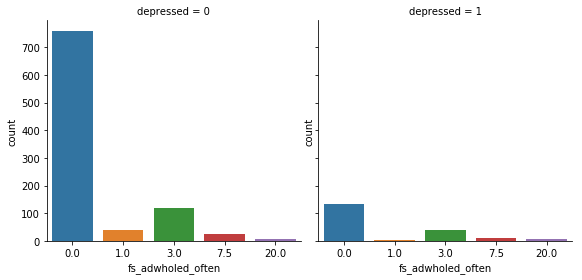

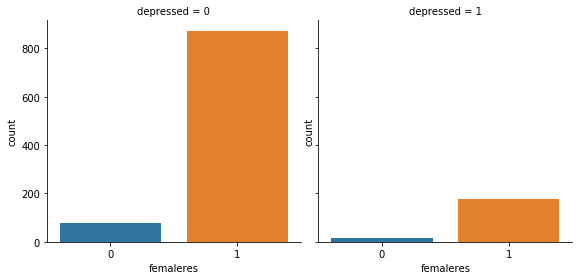

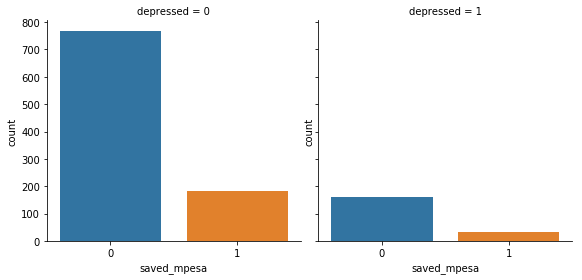

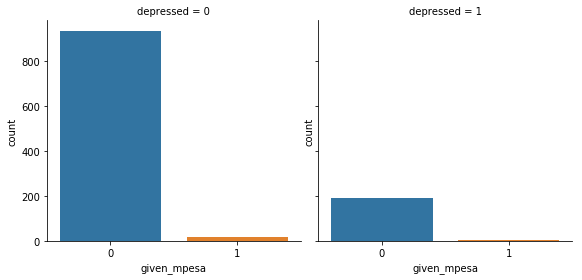

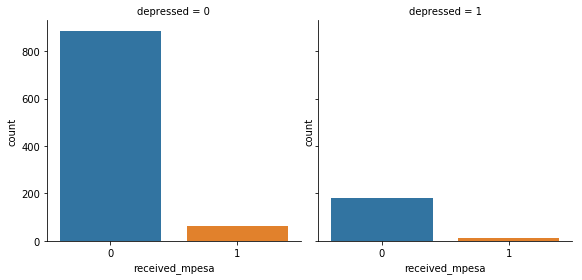

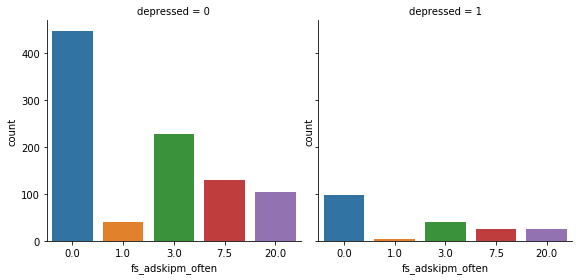

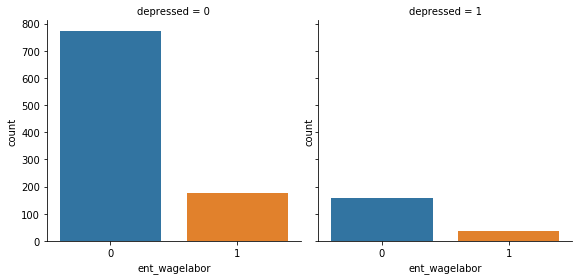

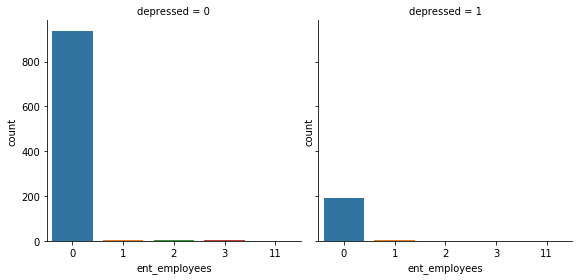

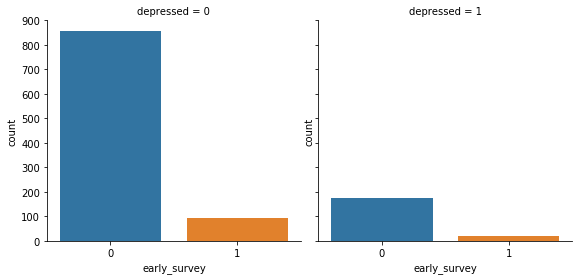

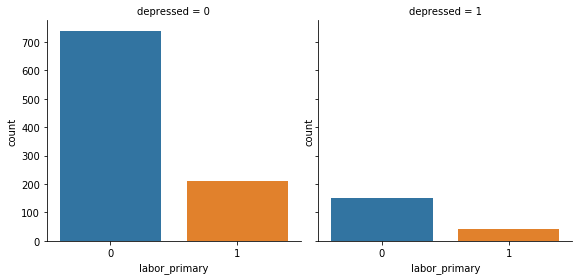

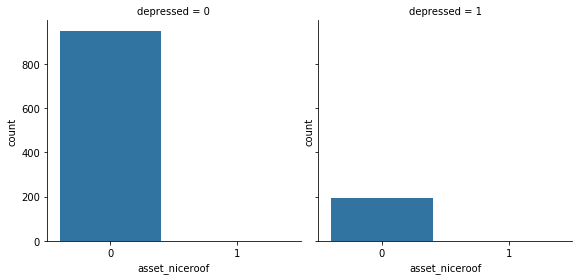

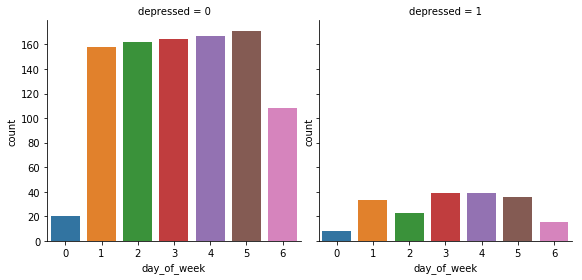

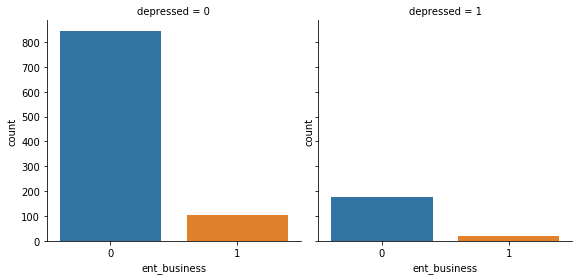

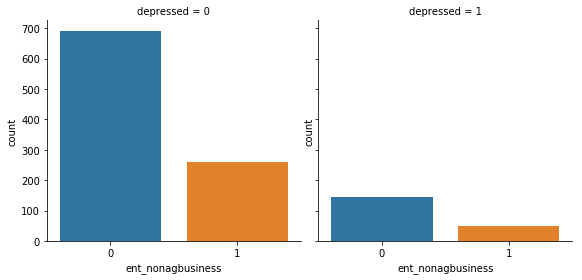

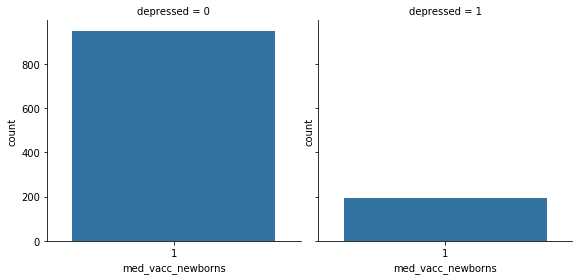

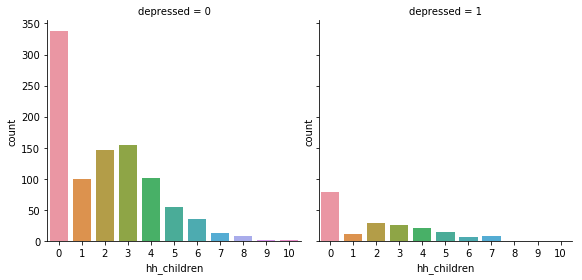

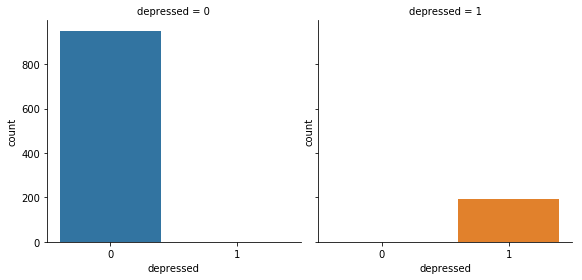

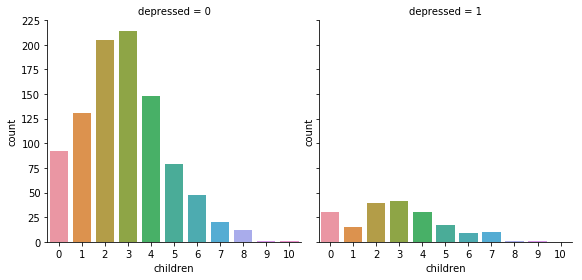

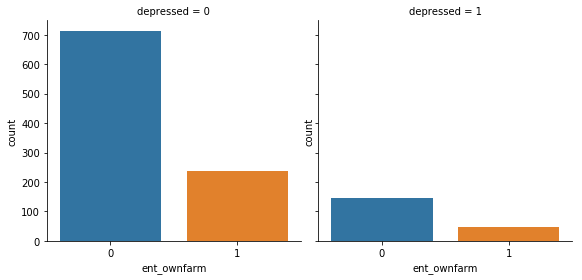

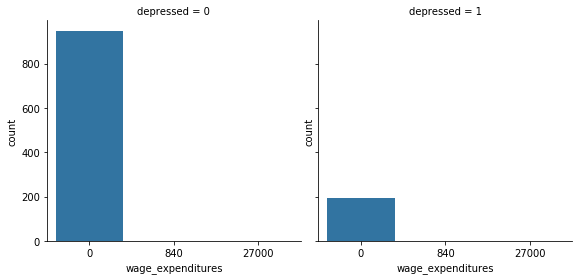

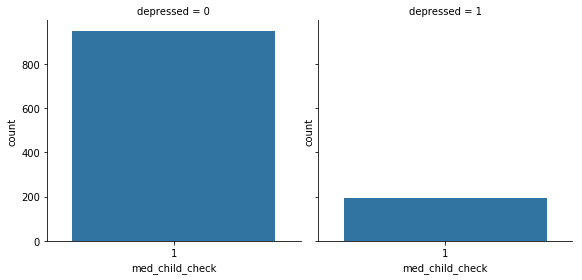

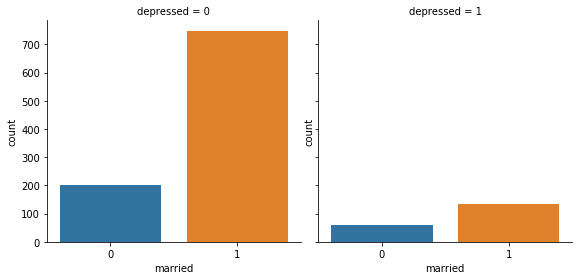

In [14]:
def plot_bar(data, cols,hue='depressed'):
    for col in cols:
        plt.figure(figsize=(22,5))
        g = sns.factorplot(x=col, col=hue,
data=data, kind="count");
        plt.xlabel(col) # Set text for the x axis
        plt.ylabel('count')# Set text for y axis
        plt.show()
        
plot_bar(data=tr,cols=cat_col)

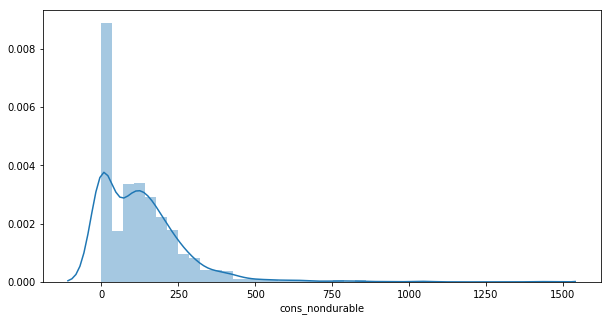

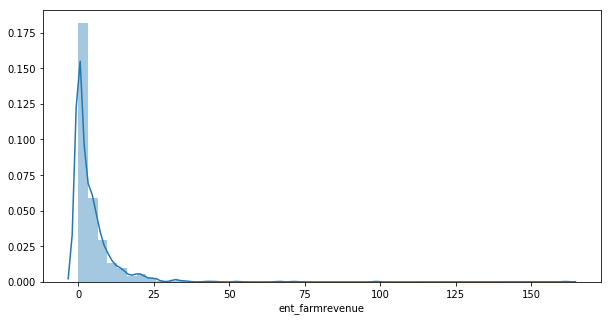

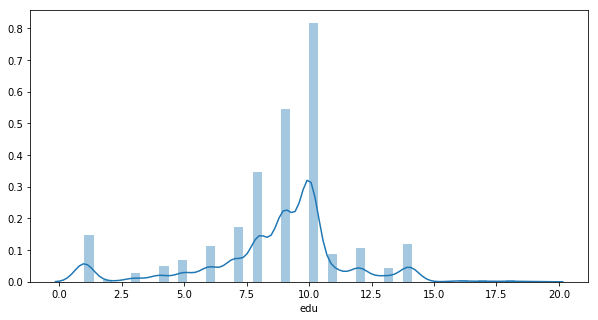

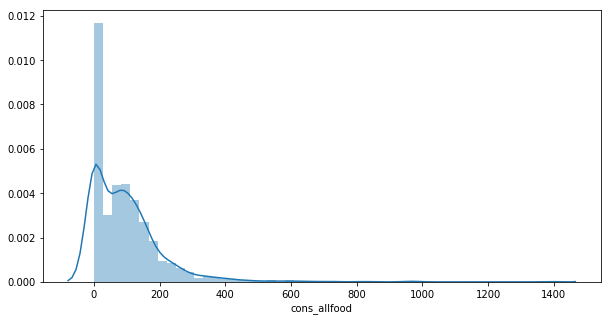

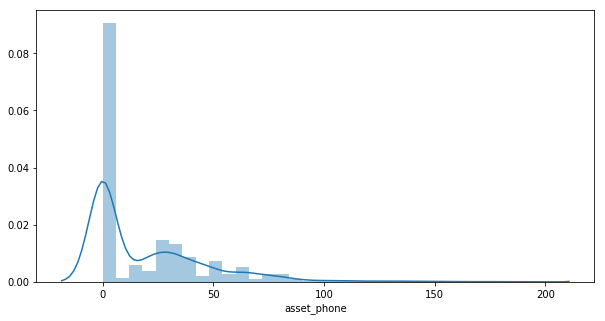

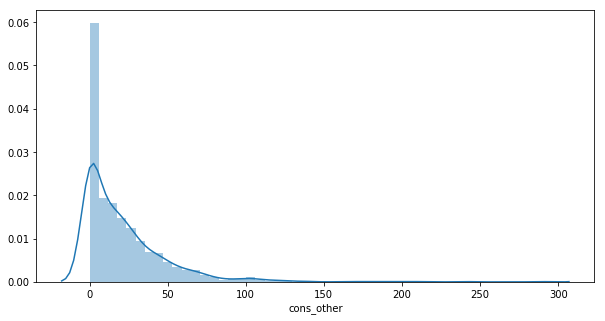

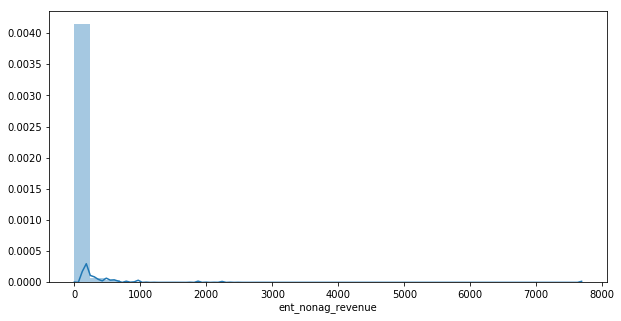

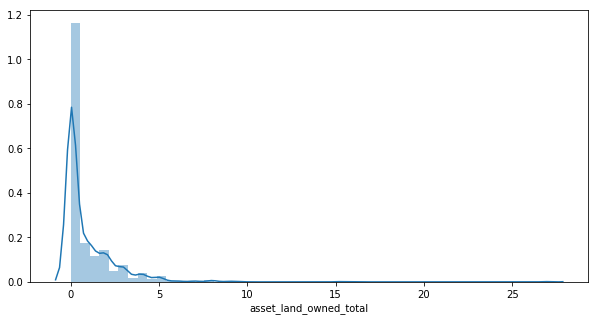

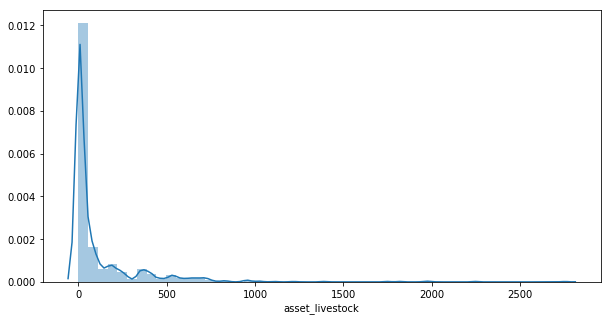

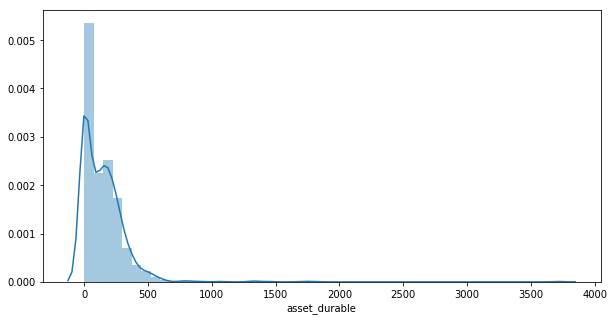

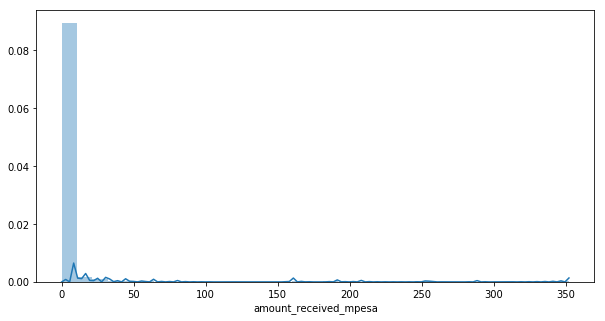

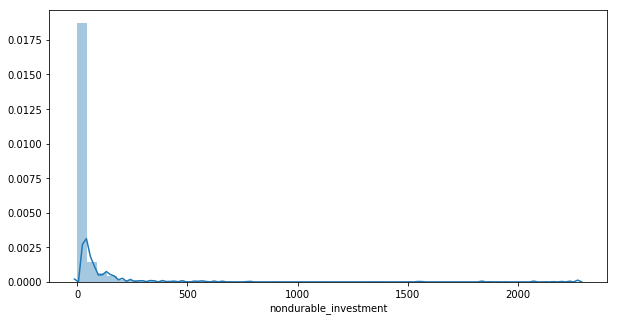

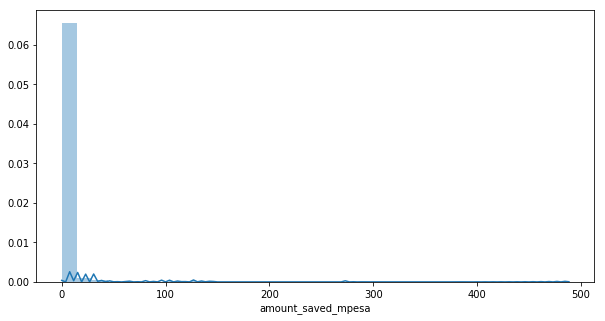

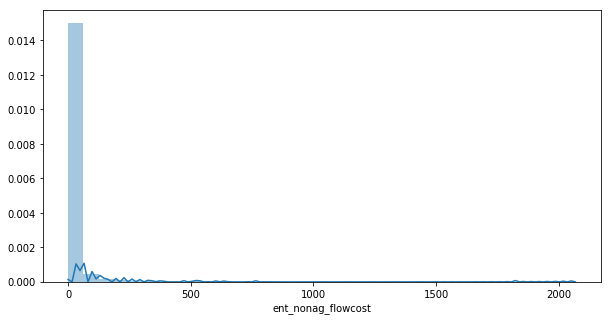

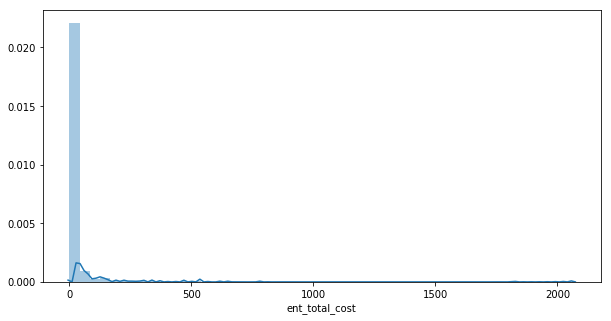

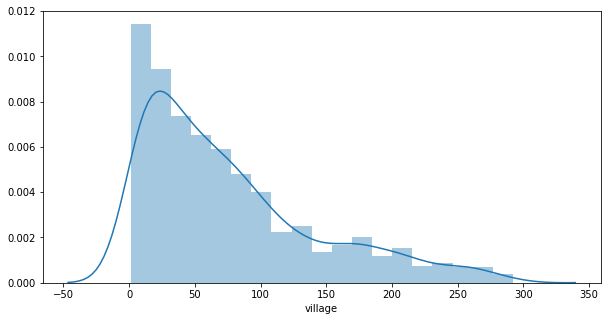

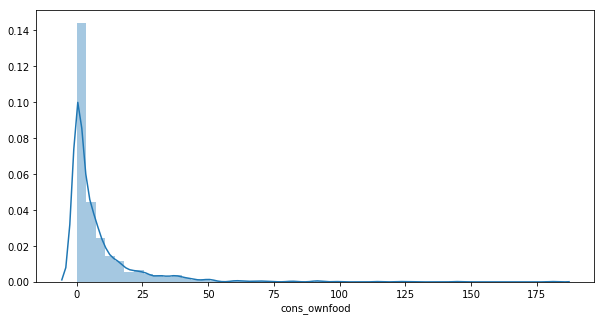

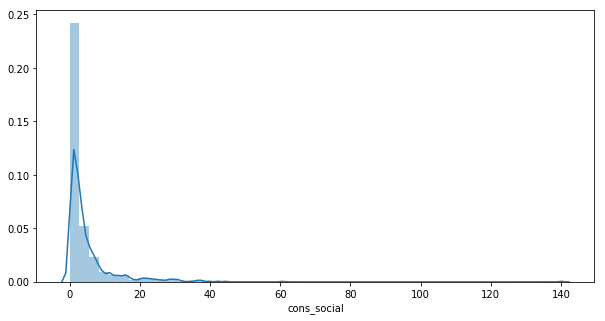

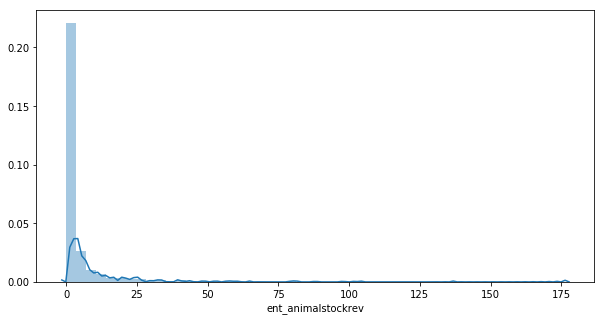

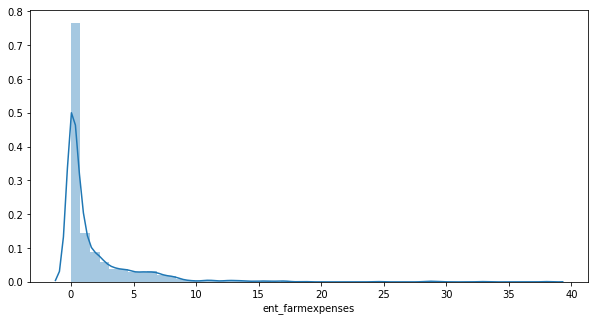

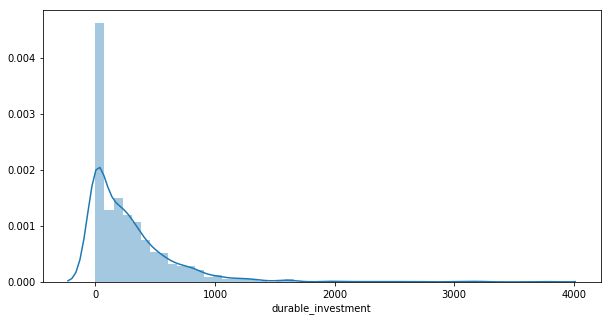

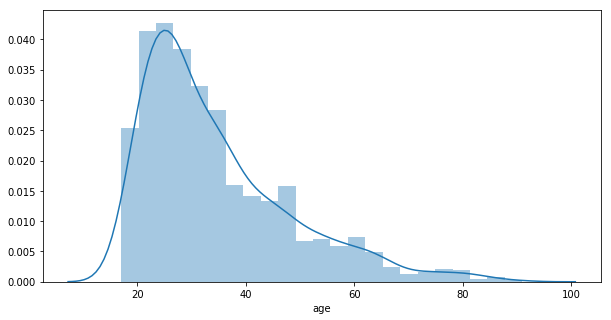

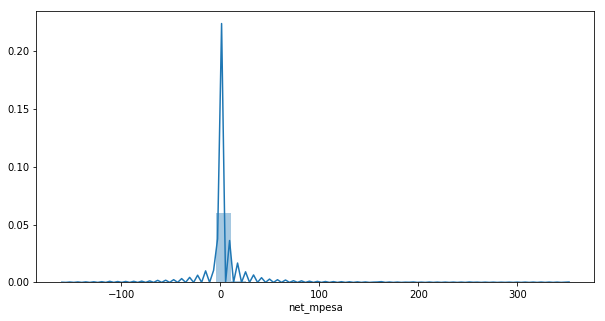

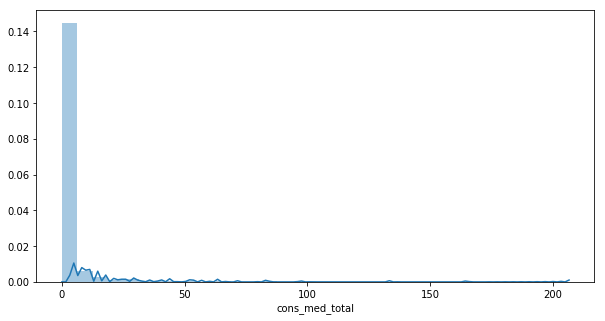

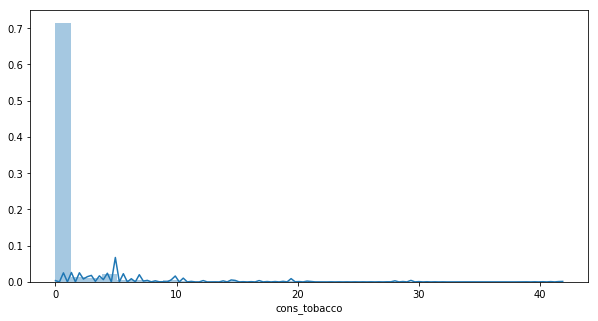

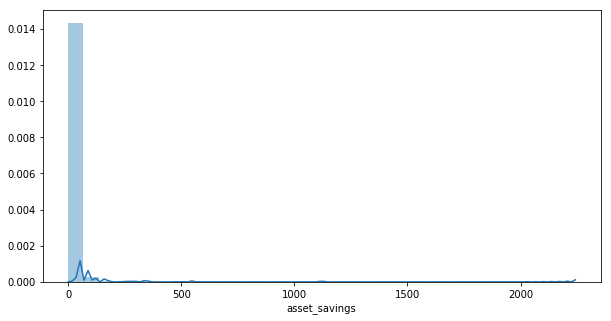

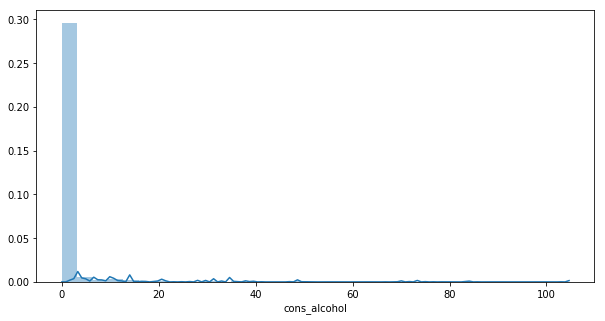

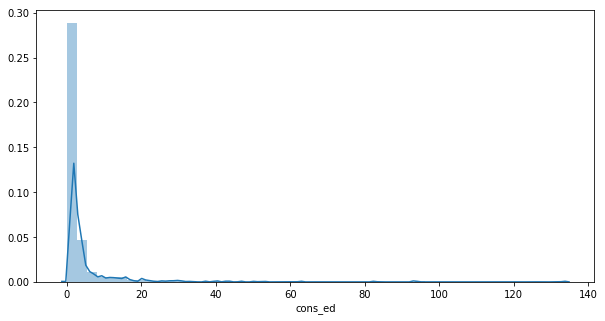

In [15]:
def plot_dist(data, cols):
    for col in cols:
        plt.figure(figsize=(10,5))
        sns.distplot(data[col].dropna());
        plt.show()
        
plot_dist(data=tr,cols=num_col)